1. Импорт данных


Установка зависимостей и установка

In [2]:
'''
Ошибка № 1. Возникала ошибка InvalidArgumentError: Input Data is Empty при обучении модели и при выполнении команды:
image_count = len(list(data_carp))
print(image_count)
Решение: 2 изображения в папке "миелоцит" были повреждены (не открывалсь в Гугл диске). Данные изображения были удалены.


'''

'\nОшибка № 1. Возникала ошибка InvalidArgumentError: Input Data is Empty при обучении модели и при выполнении команды:\nimage_count = len(list(data_carp))\nprint(image_count)\nРешение: 2 изображения в папке "миелоцит" были повреждены (не открывалсь в Гугл диске). Данные изображения были удалены.\n\n\n'

In [3]:
# работа с файловой системой
import os
import tensorflow as tf

2023-06-30 15:05:37.266704: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 15:05:37.861096: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2023-06-30 15:05:38.541020: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-30 15:05:38.576386: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Установка данных

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
# подключение к вашему гугл диску, на котором имеется папка с данными
# from google.colab import drive 
# drive.mount('/content/gdrive') 

In [7]:
# Download and explore the dataset
import PIL
import pathlib
dataset_url = './data/Изображения подготовленные/Осетр'
data_dir = pathlib.Path(dataset_url)

image_count = len(list(data_dir.glob('*/*.*')))
print('image_count:', image_count)

paths = list(data_dir.glob('*/*.*'))

classes_names = list(str(data_dir.glob('*')))


image_count: 640


In [8]:
# Имена классов
classes_paths = list((data_dir.glob('*/*.*')))
classes_paths = list(map(str, classes_paths)) # Список элементов str

classes_names = list((data_dir.glob('*'))) # Спиок элементов PosixPath
classes_n = len(classes_names)
classes_names = list(map(str, classes_names)) # Список элементов str
classes_names = [classes_names[i][classes_names[i].rfind(r'/') + 1:] for i in range(classes_n)]

print(classes_paths)
print(classes_names)
print(classes_n)

['data/Изображения подготовленные/Осетр/эозинофил/Эозинофил3.jpg', 'data/Изображения подготовленные/Осетр/эозинофил/эз22.jpg', 'data/Изображения подготовленные/Осетр/эозинофил/Эозинофил 6.PNG', 'data/Изображения подготовленные/Осетр/эозинофил/эозинофил 6-рус 1.jpg', 'data/Изображения подготовленные/Осетр/эозинофил/Эозинофил1.jpg', 'data/Изображения подготовленные/Осетр/эозинофил/эз24.jpg', 'data/Изображения подготовленные/Осетр/эозинофил/эозинофил 3-стерлядь 1.jpg', 'data/Изображения подготовленные/Осетр/эозинофил/эз25.jpg', 'data/Изображения подготовленные/Осетр/эозинофил/эозинофил 2.PNG', 'data/Изображения подготовленные/Осетр/эозинофил/5.jpg', 'data/Изображения подготовленные/Осетр/эозинофил/эз26.jpg', 'data/Изображения подготовленные/Осетр/эозинофил/эозинофил 1.PNG', 'data/Изображения подготовленные/Осетр/эозинофил/1.jpg', 'data/Изображения подготовленные/Осетр/эозинофил/Эозинофил5.jpg', 'data/Изображения подготовленные/Осетр/эозинофил/эозинофил 6-рус 5.jpg', 'data/Изображения подг

In [9]:
#list((data_dir.glob('*' + str(classes_names[6]) + '/*.*')))

In [10]:
#list((data_dir.glob(r'*content/gdrive/MyDrive/Клетки крови рыб/Изображения подготовленные/Карп/миелоцит/*.*')))

classes_sizes: [41, 42, 25, 29, 110, 3, 30, 11, 88, 48, 6, 9, 6, 192]
sum(classes_sizes): 640


<Axes: >

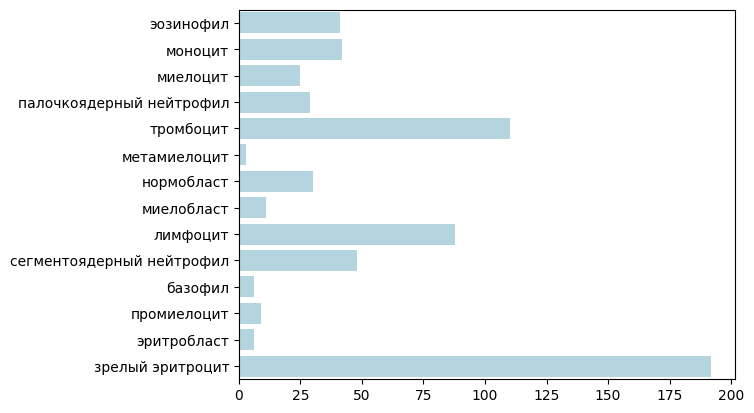

In [11]:
import seaborn as sns
classes_sizes = []

for i in range(classes_n):
    counter = 0
    class_folderName = '/' + classes_names[i] + '/'
    for j in range(image_count):
        if class_folderName in classes_paths[j]:
            counter += 1
    classes_sizes.append(counter)

print('classes_sizes:', classes_sizes)
print('sum(classes_sizes):', sum(classes_sizes))


sns.barplot(y = classes_names, x = classes_sizes, color = 'lightblue')



In [12]:
#list((data_dir.glob('*/' + str(classes_names[0]) )))
classes_sizes = [len(list((data_dir.glob('*' + str(classes_names[i]) + '/*.*')))) for i in range(classes_n)]
print('classes_sizes:', classes_sizes)
print('sum(classes_sizes):', sum(classes_sizes))

classes_sizes: [41, 42, 37, 29, 110, 3, 30, 11, 88, 48, 6, 9, 6, 192]
sum(classes_sizes): 652


In [13]:
data_osetr = tf.keras.utils.image_dataset_from_directory('./data/Изображения подготовленные/Осетр')
print(tf.data.experimental.cardinality(data_osetr).numpy())

image_count = len(list(data_osetr))
print(image_count)



Found 640 files belonging to 14 classes.
20
20


2023-06-30 15:05:39.257011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [640]
	 [[{{node Placeholder/_4}}]]
2023-06-30 15:05:39.257240: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [640]
	 [[{{node Placeholder/_4}}]]


In [14]:
list(data_osetr)

[(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
  array([[[[241.      , 223.      , 223.      ],
           [240.38672 , 222.38672 , 222.38672 ],
           [240.      , 222.      , 222.      ],
           ...,
           [239.      , 219.      , 221.      ],
           [239.38672 , 219.38672 , 221.38672 ],
           [240.      , 220.      , 222.      ]],
  
          [[241.      , 223.      , 223.      ],
           [240.88861 , 222.88861 , 222.88861 ],
           [240.52747 , 222.52747 , 222.52747 ],
           ...,
           [239.      , 219.      , 221.      ],
           [239.07025 , 219.07025 , 221.07025 ],
           [239.18164 , 219.18164 , 221.18164 ]],
  
          [[241.      , 223.      , 223.      ],
           [241.      , 223.      , 223.      ],
           [240.8924  , 222.8924  , 222.8924  ],
           ...,
           [239.      , 219.      , 221.      ],
           [239.      , 219.      , 221.      ],
           [239.      , 219.      , 221.      ]],


In [15]:
# приводим к численному виду
data_iterator = data_osetr.as_numpy_iterator()

In [16]:
# проходим по каждому batch
batch = data_iterator.next()

In [17]:
imgs, labels = next(data_iterator)
labels

array([ 1, 10,  1, 11, 11,  9,  1, 10, 11,  6,  1,  1,  6,  6, 10, 11,  1,
       11,  8,  1, 10,  1,  1, 11,  1, 11, 10,  1,  1,  5,  0,  1],
      dtype=int32)

1
1
6
1
11


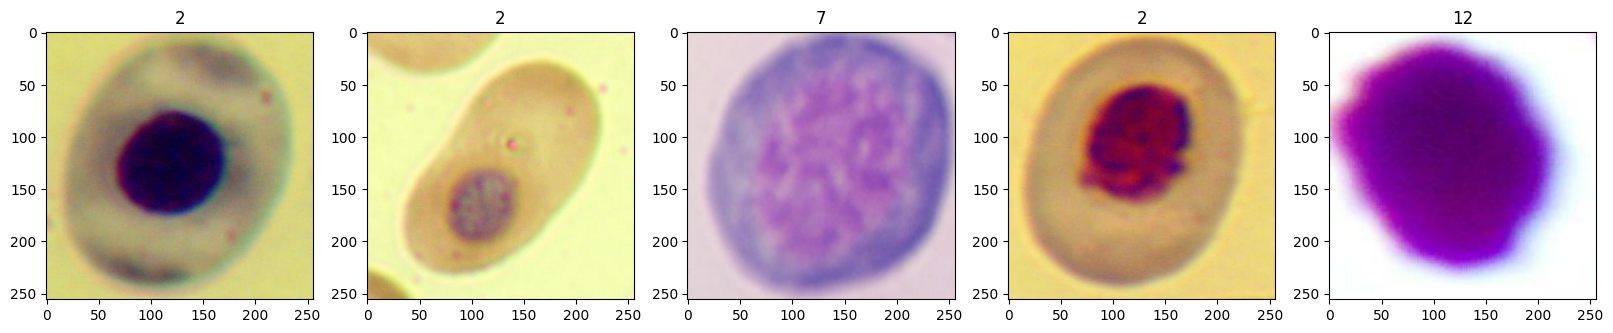

In [18]:
# каждый класс (от 0 до 14) определяет клетку крови
# например 0 - базофил, 14 - эритробласт
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    print(batch[1][idx])
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx] + 1)

In [19]:
for image_batch, labels_batch in data_osetr:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

#print(tf.data.experimental.cardinality(data_carp).numpy())

(32, 256, 256, 3)
(32,)


Маштабируем данные

In [20]:
# значение batch[0] от 0 до 255
# приведет к значению от 0 до 1 для оптимизации
data = data_osetr.map(lambda x, y: (x / 255, y))

In [21]:
# опять приводим к виду numpy
data.as_numpy_iterator().next()[0][0]

2023-06-30 15:05:40.530963: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [640]
	 [[{{node Placeholder/_0}}]]
2023-06-30 15:05:40.531267: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [640]
	 [[{{node Placeholder/_4}}]]


array([[[0.579079  , 0.44182405, 0.45751032],
        [0.5757534 , 0.43987715, 0.45763144],
        [0.5713848 , 0.44197303, 0.47023183],
        ...,
        [0.9764706 , 1.        , 1.        ],
        [0.9764706 , 1.        , 1.        ],
        [0.9764706 , 1.        , 1.        ]],

       [[0.5764706 , 0.4392157 , 0.4549271 ],
        [0.5751296 , 0.4392534 , 0.4573612 ],
        [0.5699908 , 0.44057906, 0.47032782],
        ...,
        [0.9764706 , 1.        , 1.        ],
        [0.9764706 , 1.        , 1.        ],
        [0.9764706 , 1.        , 1.        ]],

       [[0.5766447 , 0.44830525, 0.46707463],
        [0.5792754 , 0.4507475 , 0.47251683],
        [0.5796415 , 0.4502298 , 0.47997856],
        ...,
        [0.9764706 , 1.        , 1.        ],
        [0.9764706 , 1.        , 1.        ],
        [0.9764706 , 1.        , 1.        ]],

       ...,

       [[0.9598346 , 0.99905026, 1.        ],
        [0.9596676 , 0.9988833 , 0.99983305],
        [0.9588848 , 0

Разделение данных (train, validation, test)

In [22]:
len(data_osetr)

20

In [23]:
len(data)

20

In [24]:
train_size = round(len(data_osetr) * .8)
validation_size = round(len(data_osetr) * .1)
test_size = round(len(data_osetr)* .1)

In [25]:
train = data_osetr.take(train_size)
validation = data_osetr.skip(train_size).take(validation_size)
test = data_osetr.skip(train_size + validation_size).take(test_size)

'''
train = data.take(train_size)
validation = data.skip(train_size).take(validation_size)
test = data.skip(train_size + validation_size).take(test_size)
'''



'\ntrain = data.take(train_size)\nvalidation = data.skip(train_size).take(validation_size)\ntest = data.skip(train_size + validation_size).take(test_size)\n'

Создание нейронной модели

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras import callbacks
import pandas as pd

In [27]:
'''
model = Sequential([
    Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])
'''

'''
# accuracy_best = 0.06
model = Sequential([
    Conv2D(16, (3,3), 1, activation='relu', padding = 'same', input_shape=(256,256,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(32, (3,3), 1, activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(16, (3,3), 1, activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    #Dropout(0.5),
    Dense(15, activation='softmax'),
    #Flatten() # Иначе ошибка при model.fit()
    #GlobalAveragePooling2D()

])
'''


# accuracy_best = 0.375
model = Sequential([
    Conv2D(filters = 16, 
           kernel_size = (3, 3), 
           strides = (1, 1), 
           padding = 'same', 
           activation='relu', 
           input_shape = (256, 256, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    #Dropout(0.5),
    Dense(14, activation='softmax'),
    #Flatten() # Иначе ошибка при model.fit()
    #GlobalAveragePooling2D()

])




In [28]:
'''
model.compile(
    optimizer='adam',
    loss=tf.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)
'''

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 262144)            0         
                                                                 
 dense (Dense)               (None, 256)               67109120  
                                                                 
 dense_1 (Dense)             (None, 14)                3598      
                                                                 
Total params: 67,113,166
Trainable params: 67,113,166
Non-trainable params: 0
____________________________________________

Обучение

In [30]:
# тут можно добавить логи, но пока не разобрался как

In [31]:
# остановка при стагнации
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=3, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [32]:
history = model.fit(x = train, epochs = 20, validation_data=validation, callbacks=[early_stopping])

Epoch 1/20


2023-06-30 15:05:44.667417: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [640]
	 [[{{node Placeholder/_4}}]]
2023-06-30 15:05:44.667678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [640]
	 [[{{node Placeholder/_4}}]]


16/16 [==============================] - ETA: 0s - loss: 10221.0957 - accuracy: 0.2578

2023-06-30 15:05:54.514790: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [640]
	 [[{{node Placeholder/_4}}]]
2023-06-30 15:05:54.515034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [640]
	 [[{{node Placeholder/_4}}]]


16/16 [==============================] - 10s 617ms/step - loss: 10221.0957 - accuracy: 0.2578 - val_loss: 3335.1030 - val_accuracy: 0.4844
Epoch 2/20
16/16 [==============================] - 10s 621ms/step - loss: 1470.7863 - accuracy: 0.4414 - val_loss: 465.5311 - val_accuracy: 0.2812
Epoch 3/20
16/16 [==============================] - 10s 616ms/step - loss: 253.6762 - accuracy: 0.4062 - val_loss: 114.5182 - val_accuracy: 0.4531
Epoch 4/20
16/16 [==============================] - 10s 605ms/step - loss: 77.5424 - accuracy: 0.5371 - val_loss: 33.0401 - val_accuracy: 0.6250
Epoch 5/20
16/16 [==============================] - 10s 613ms/step - loss: 37.0820 - accuracy: 0.5449 - val_loss: 42.7635 - val_accuracy: 0.5938
Epoch 6/20
16/16 [==============================] - 10s 600ms/step - loss: 20.7974 - accuracy: 0.6055 - val_loss: 16.1521 - val_accuracy: 0.6094
Epoch 7/20
16/16 [==============================] - 10s 605ms/step - loss: 19.0081 - accuracy: 0.6094 - val_loss: 6.9190 - val_accu

In [33]:
validation

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Plots

Minimum validation loss: 0.826502799987793


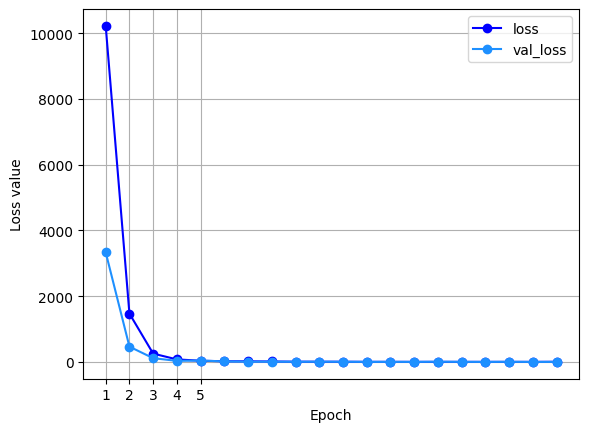

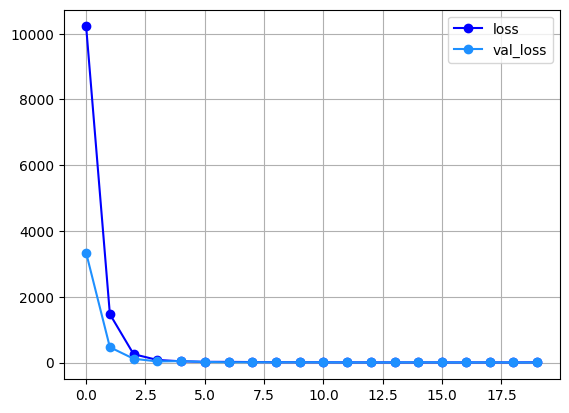

In [34]:
# вывод в виде граффика
xi = [0, 1, 2, 3, 4]
x = [1, 2, 3, 4, 5]
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(color = ['blue', 'dodgerblue'], 
                                             marker = 'o',
                                             grid = True,);
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.xticks(xi, x)
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

history_df.loc[:, ['loss', 'val_loss']].plot(color = ['blue', 'dodgerblue'], 
                                             marker = 'o',
                                             grid = True,);

In [35]:
history_df.loc[:, ['loss', 'val_loss']]

,loss,val_loss
0,10221.095703,3335.103027
1,1470.786255,465.531128
2,253.676224,114.518188
3,77.542404,33.040066
4,37.081963,42.763542
5,20.797419,16.152115
6,19.008076,6.919011
7,13.832721,8.171064
8,8.082429,5.641341
9,7.316618,7.314073


Maximum validation accuracy: 0.28125


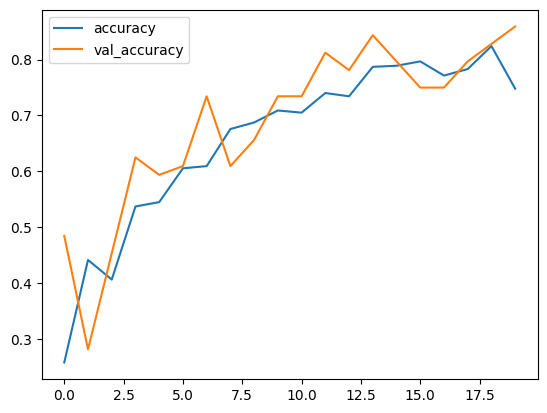

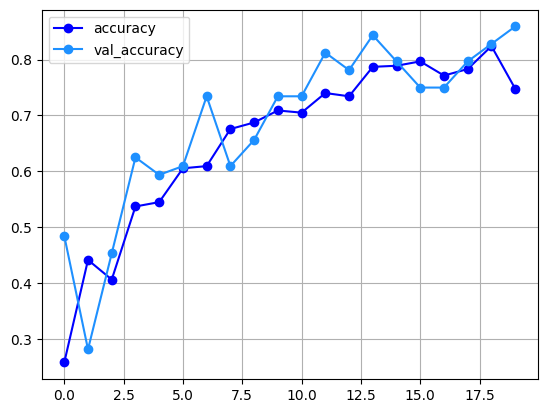

In [36]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();
print("Maximum validation accuracy: {}".format(history_df['val_accuracy'].min()))

history_df.loc[:, ['accuracy', 'val_accuracy']].plot(color = ['blue', 'dodgerblue'], 
                                             marker = 'o',
                                             grid = True,);

Оценка

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, Accuracy

0
1/1 [==============================] - 0s 84ms/step
2
8
10
11
8
1
1
1/1 [==============================] - 0s 87ms/step
1
1
2
11
10
5
y:
[ 1  1  2 11 10  5  2  7 11 13 12  1  2  2  2  6  1  6 11 10  8  7  7  1
  6 11 12  4 12  1 10  1]
y_pred:
[ 1  1  1 11  1  2 11 11 11  8 11  1  1  1  2  6  1 11 11 10  8  7  7  1
  6 11  1  4  1  1  1  1]
Precision: 1.0, Recall:1.0, Accuracy: 0.578125



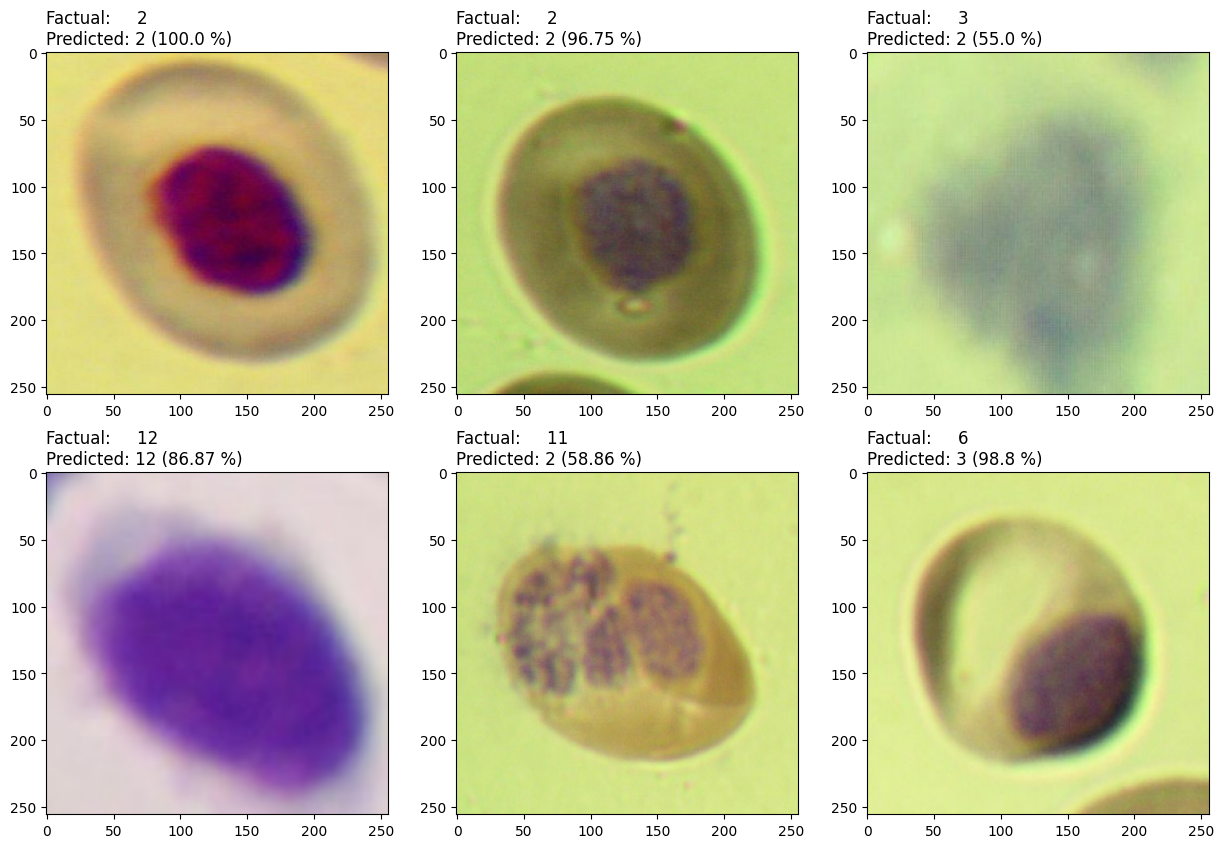

In [51]:
precision = Precision()
recall = Recall()
accuracy = Accuracy()

i = 0


float_formatter = "{:.4}".format

figure_nrows = 2
figure_ncols = 3
figure_nplots = figure_nrows * figure_ncols

fig, ax = plt.subplots(nrows = figure_nrows, ncols = figure_ncols, figsize = (15, 10))
for batch in test.as_numpy_iterator(): 
    print(i)
    i += 1
    X, y = batch
    yhat = model.predict(X)
    y_pred = np.asarray([np.argmax(i) for i in yhat], dtype = 'int32')
    y_pred_prob = (np.asarray([np.max(i) for i in yhat], dtype = 'float32') * 100)
    precision.update_state(y, y_pred)
    recall.update_state(y, y_pred)
    accuracy.update_state(y, y_pred)

    col_idx = 0
    row_idx = 0
    for idx, img in enumerate(batch[0][:figure_nplots]):

        if col_idx == figure_ncols:
            col_idx = 0
            row_idx += 1

        print(batch[1][idx])
        ax[row_idx, col_idx].imshow(img.astype(int))
        plot_text = f'Factual:     {y[idx] + 1} \nPredicted: {y_pred[idx] + 1} ({float_formatter(y_pred_prob[idx])} %)'
        #ax[row_idx, col_idx].title.set_text(plot_text)
        
        ax[row_idx, col_idx].set_title(plot_text, loc = 'left')

        col_idx += 1

print('y:')
print(y)
print('y_pred:')
print(y_pred)
print(f'Precision: {precision.result()}, Recall:{recall.result()}, Accuracy: {accuracy.result()}')
print()

11
11
1
11
8


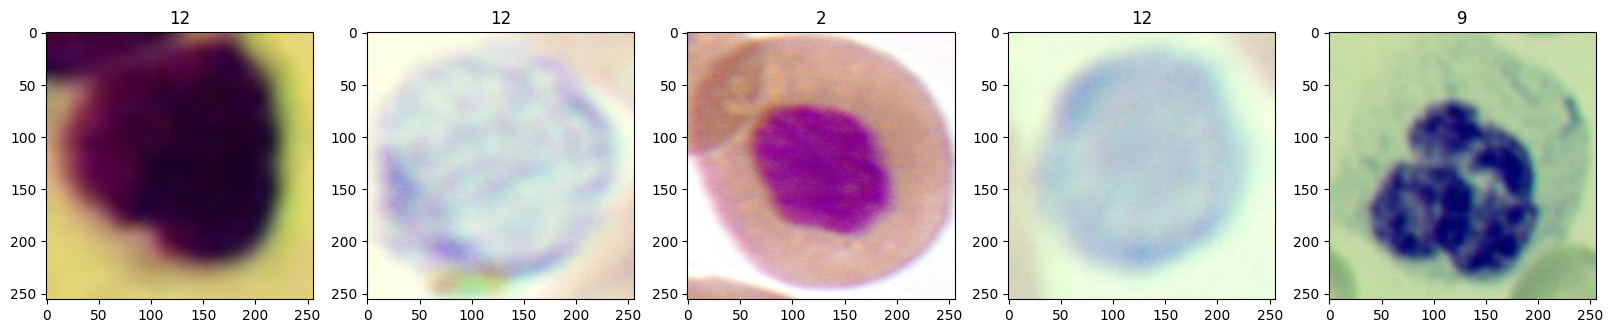

In [47]:
# каждый класс (от 0 до 14) определяет клетку крови
# например 0 - базофил, 14 - эритробласт
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    print(batch[1][idx])
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx] + 1)

In [39]:
yhat

array([[0.00000000e+00, 1.70892263e-26, 3.89610420e-07, 5.41536876e-33,
        1.35586421e-22, 2.10609530e-27, 6.21321306e-08, 5.62395696e-21,
        3.21268678e-19, 3.35698180e-25, 1.94216341e-07, 9.99999225e-01,
        5.03843432e-37, 0.00000000e+00],
       [5.63746726e-04, 1.17704021e-02, 7.22466066e-05, 8.60079016e-14,
        5.35659606e-09, 1.77514652e-04, 1.05649754e-02, 2.33732611e-02,
        4.85030143e-03, 7.36263522e-04, 1.33798885e-05, 9.47877765e-01,
        8.55794369e-08, 0.00000000e+00],
       [8.52005535e-32, 2.18020871e-01, 2.91667378e-16, 1.41861631e-34,
        1.20366346e-15, 2.97559752e-15, 5.23072892e-08, 7.81978905e-01,
        4.02217179e-21, 6.44656465e-21, 1.52302188e-19, 1.09861894e-07,
        3.80647033e-38, 0.00000000e+00],
       [1.47430934e-02, 7.07141608e-02, 1.08550815e-03, 8.70095622e-14,
        3.71619513e-10, 1.95915505e-04, 2.27437057e-02, 5.13033650e-04,
        2.73701572e-03, 1.72681262e-04, 2.47104454e-05, 8.87069762e-01,
        3.761

In [40]:
y

array([11, 11,  1, 11,  8, 11,  1,  1,  2, 10, 10, 11,  1,  1, 11,  4,  1,
       12,  1,  7,  1,  1, 11, 11,  5,  2, 12,  0,  1,  7, 10,  7],
      dtype=int32)

In [41]:
y_pred

array([11, 11,  7, 11,  8, 11,  1,  1,  2, 10, 11, 11,  1,  1, 11,  8,  1,
       11,  1,  7,  1, 11, 11, 11,  1,  2,  1,  1,  1, 11,  7,  7],
      dtype=int32)

In [42]:
#y[13] == y_pred[13]

In [43]:
print(f'Precision: {precision.result()}, Recall:{recall.result()}, Accuracy: {accuracy.result()}')
# по итогу видно, что accuracy (точность) = 0.02, что очень мало.
# необходимо приближать это значение к 1.0

Precision: 0.984375, Recall:1.0, Accuracy: 0.625


In [44]:
accuracy.result().numpy()

0.625

In [45]:
precision.update_state(y, y_pred)

In [46]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [51]:
# '''
# https://www.kaggle.com/search?q=multi+classification+images+conv2d
# https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial

# https://www.tensorflow.org/tutorials/images/classification

# '''


# # confusion matrix
# import seaborn as sns
# # Predict the values from the validation dataset
# Y_pred = model.predict(X_val)
# # Convert predictions classes to one hot vectors 
# Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# # Convert validation observations to one hot vectors
# Y_true = np.argmax(Y_val,axis = 1) 
# # compute the confusion matrix
# confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# # plot the confusion matrix
# f,ax = plt.subplots(figsize=(8, 8))
# sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()

1/1 [==============================] - 0s 80ms/step


AxisError: axis 1 is out of bounds for array of dimension 1